#初期設定

In [1]:
!echo "Google Driveをマウントします"
from google.colab import drive
drive.mount('/content/drive')

Google Driveをマウントします
Mounted at /content/drive


In [3]:
!echo "今回の作業用フォルダに移動します"
%cd /content/drive/My\ Drive/Gasyori100knock_kgr/Tutorial
!ls

今回の作業用フォルダに移動します
/content/drive/My Drive/Gasyori100knock_kgr/Tutorial
answer.cpp   imori.jpg		   README_opencv_c_install.md  sample.html
answer.html  README_javascript.md  sample.cpp
assets	     README.md		   sample_ex.html


#ライブラリ インポート

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#チュートリアル


以下のように画像読み込み

In [12]:
img = cv2.imread("imori.jpg")
img.shape #縦横長さとRGBの３チャンネル

(128, 128, 3)

型を見ると以下のように８ビットの符号なし整数型

In [16]:
img.dtype

dtype('uint8')

以下のように、cv2.imshowのようなウィンドウの表示を伴う関数はColaboでは使えないので注意

In [13]:
cv2.imshow("imori", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

DisabledFunctionError: ignored

なので画像の表示は以下のようにする

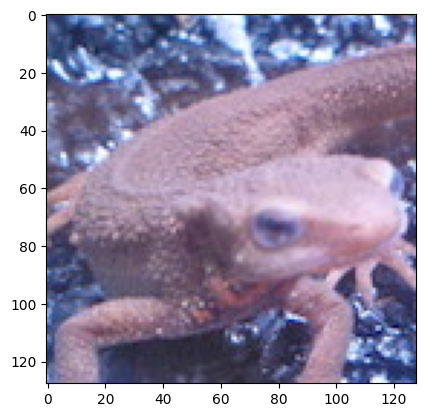

In [15]:
# plt.axis('off') #縦軸横軸を消す
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

浮動小数点型に変換すると以下のように表示がおかしくなる

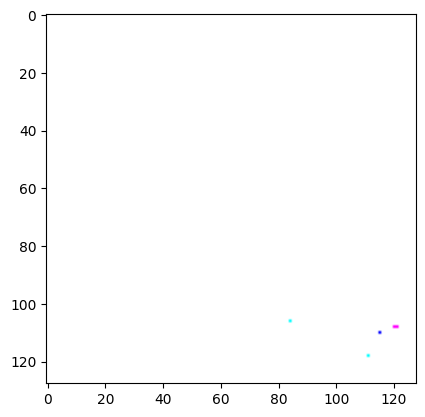

In [18]:
_img = img.astype(np.float32)
plt.imshow(cv2.cvtColor(_img, cv2.COLOR_BGR2RGB))

ので、画像をいじる時は以下のような手順を取るのが良い  
1.cv2.imreadで読み込む  
2.型を一度np.float32など小数点型に変換する  
3.画像をいじる  
4.画素が0未満のものは0, 255を超えたものは255に直す  
5.型をnp.uint8に変換して表示・保存する   

#画素をいじる

画素値の参照

In [19]:
img[20,30]

array([232, 178, 171], dtype=uint8)

In [20]:
img[20,30,1]

178

スライス

In [21]:
img[20, 30:33]

array([[232, 178, 171],
       [209, 156, 153],
       [134,  85,  77]], dtype=uint8)

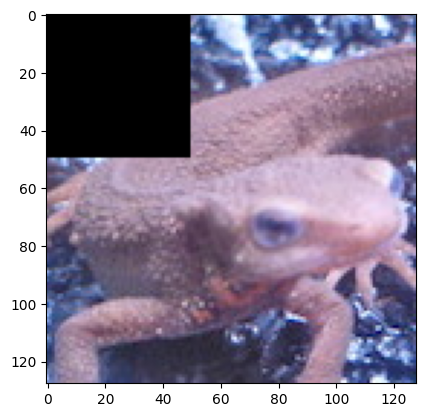

In [22]:
img2 = img.copy()
img2[:50, :50] = 0
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

260をunit8型になおすと260-256=4という画素値になるので変になる。ゆえに「画素が0未満のものは0、255を超えたものは255になおす」という操作が重要になる

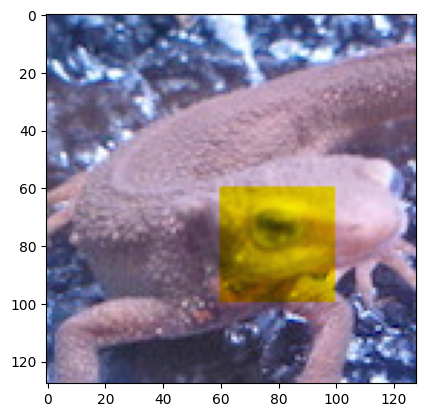

In [25]:
img2 = img.copy().astype(np.float32)
img2[60:100, 60:100, 0] = 260
img2 = img2.astype(np.uint8)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

img2 = imgとするとアドレスもコピーされてしまうので、copy()を使ってコピーし、アドレスは別々にしたほうが良いということには注意


#画像の保存

In [26]:
cv2.imwrite("sample.jpg", img2)

True

#練習
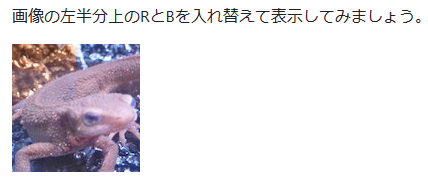

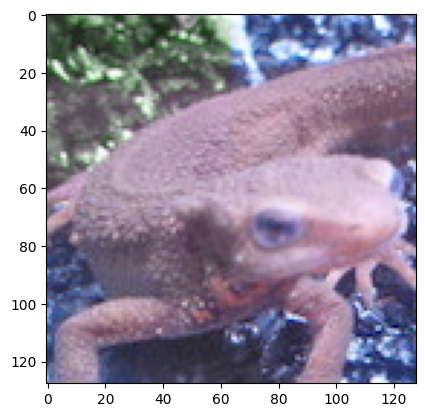

In [29]:
img3 = img.copy()
R = img3[:64, :64, 0]
img3[:64, :64, 0] = img3[:64, :64, 2]
img3[:64, :64, 2] = R
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))